In [10]:
import pandas as pd

In [22]:
data1 = pd.read_csv('sales_data_sample.csv', encoding='latin1')
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
data1.shape
data1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [13]:
# Convert date
data1['ORDERDATE'] = pd.to_datetime(data1['ORDERDATE'])

# Create month collumn
data1['MONTH'] = data1['ORDERDATE'].dt.month

# Calculate monthly sales
monthly_sales = data1.groupby('MONTH')['SALES'].sum()
print(monthly_sales)

MONTH
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64


<Axes: title={'center': 'Monthly Sales'}, xlabel='MONTH'>

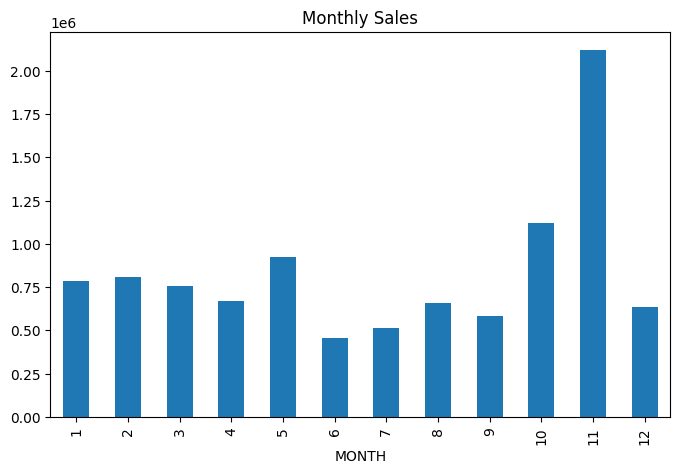

In [14]:
# Plot histogram of SALES
monthly_sales.plot(kind='bar', figsize=(8,5), title='Monthly Sales')

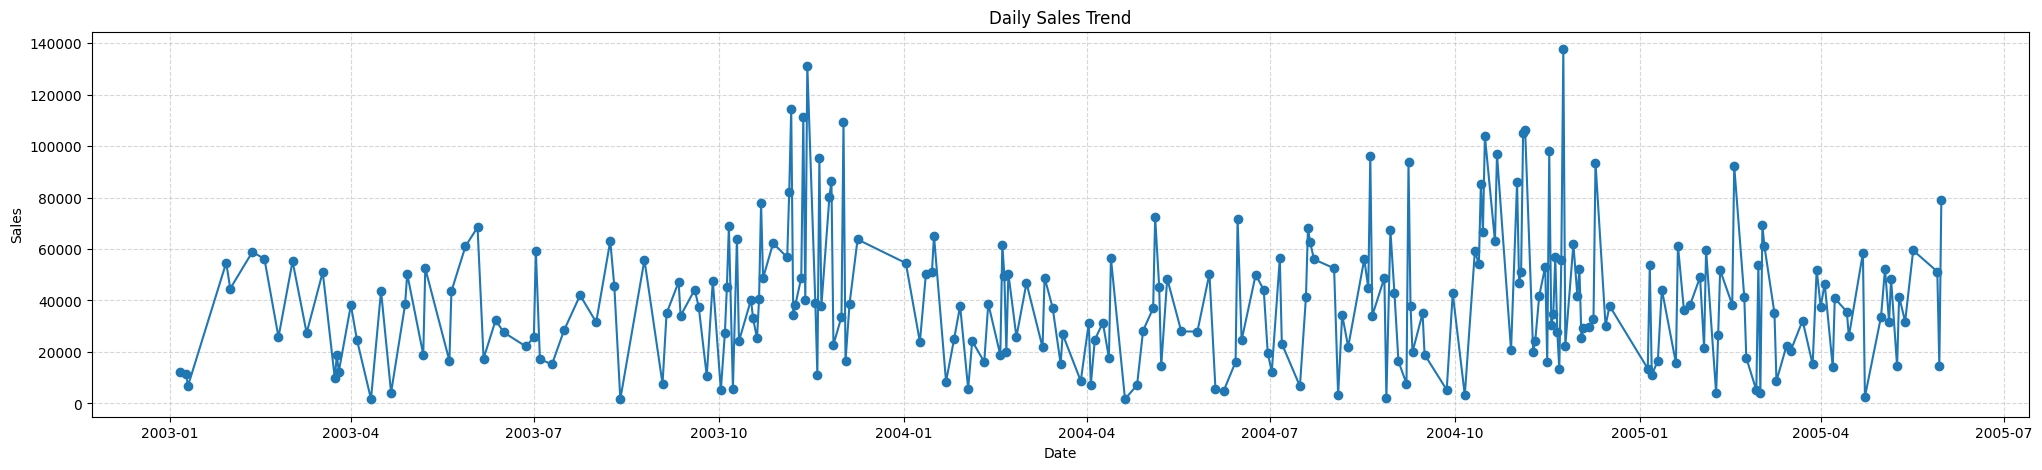

In [15]:
# Trend Analysis, forecasting, and seasonality
import matplotlib.pyplot as plt

# Aggregate sales by date (sum per day)
daily_sales = data1.groupby(data1['ORDERDATE'].dt.date)['SALES'].sum()

# Plot the daily sales trend
daily_sales.plot(figsize=(25,5), marker='o')
plt.title('Daily Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

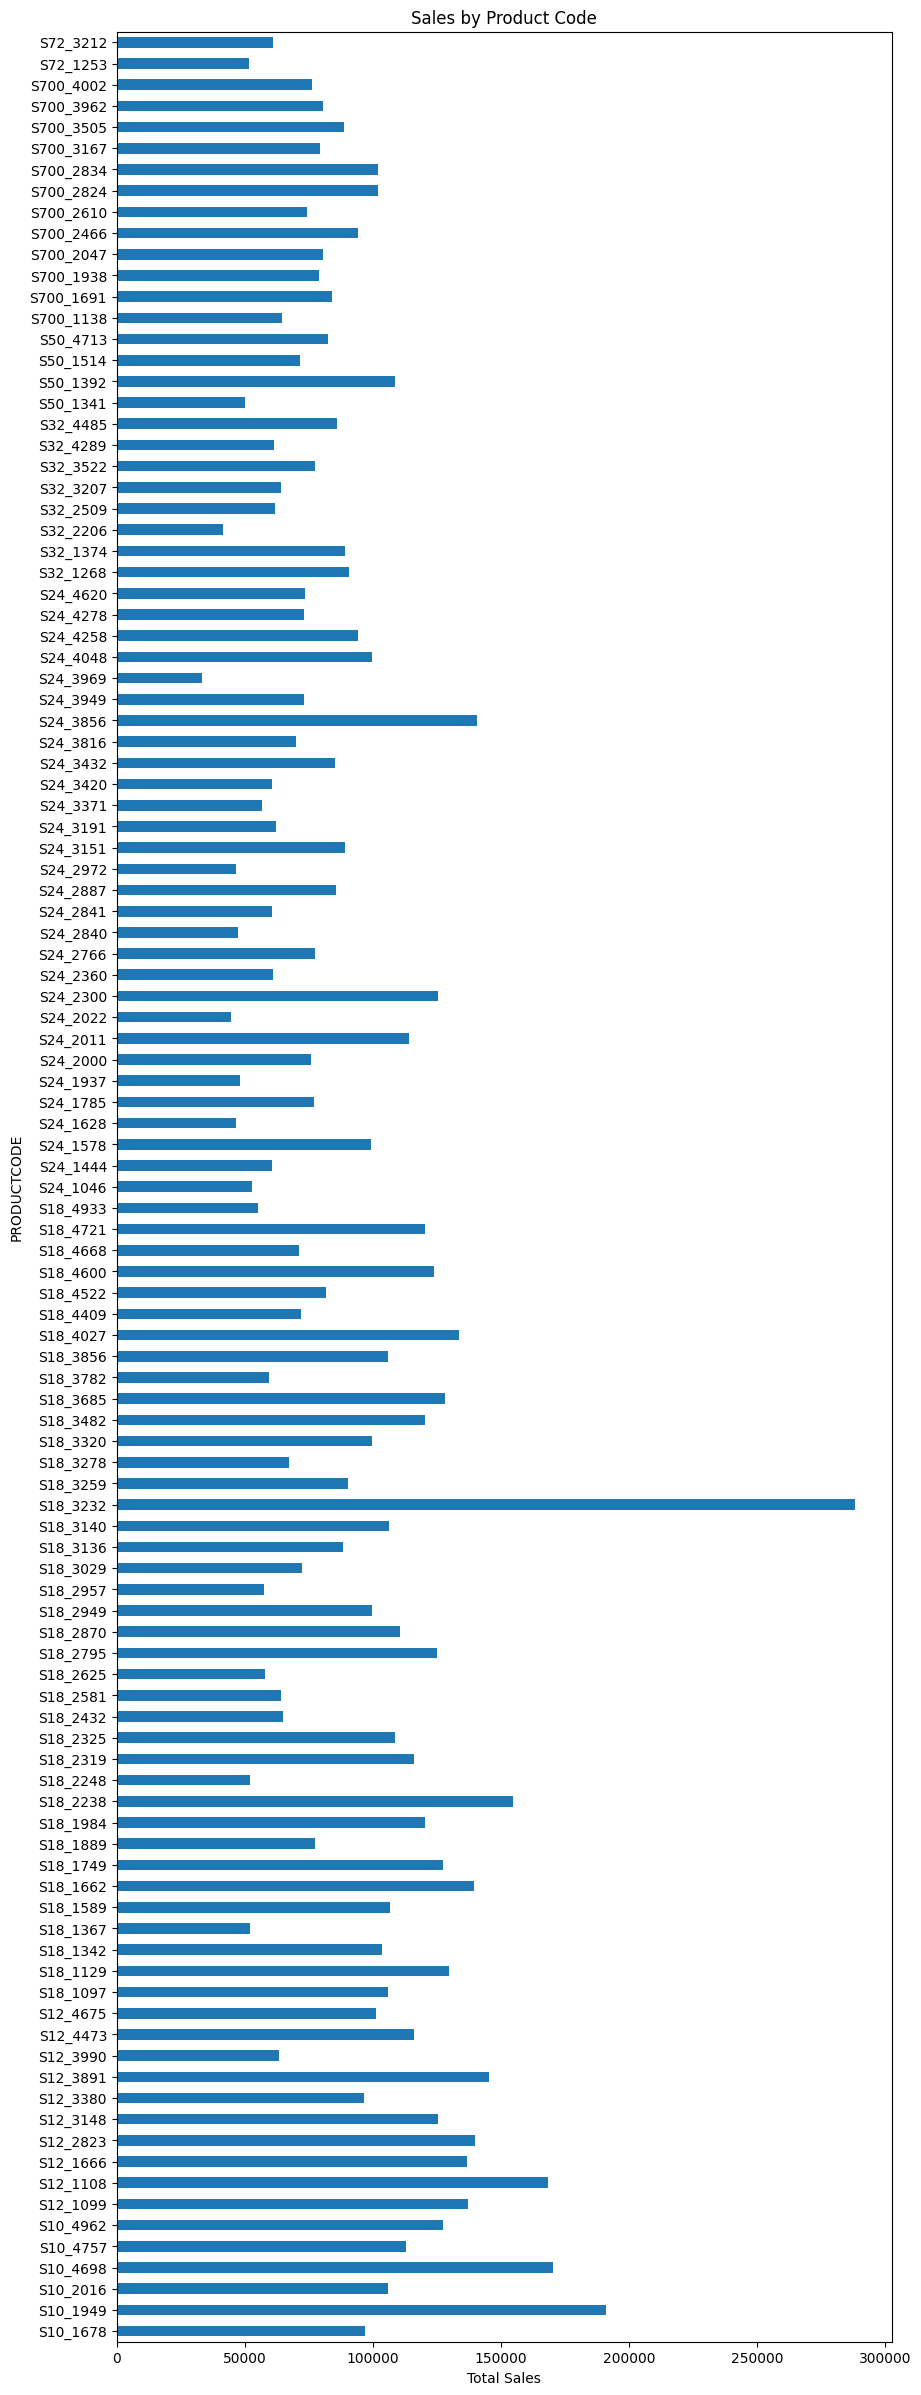

In [16]:
product_sales = data1.groupby('PRODUCTCODE')['SALES'].sum()
product_sales.plot(kind='barh', figsize=(10,30))
plt.title('Sales by Product Code')
plt.xlabel('Total Sales')
plt.show()

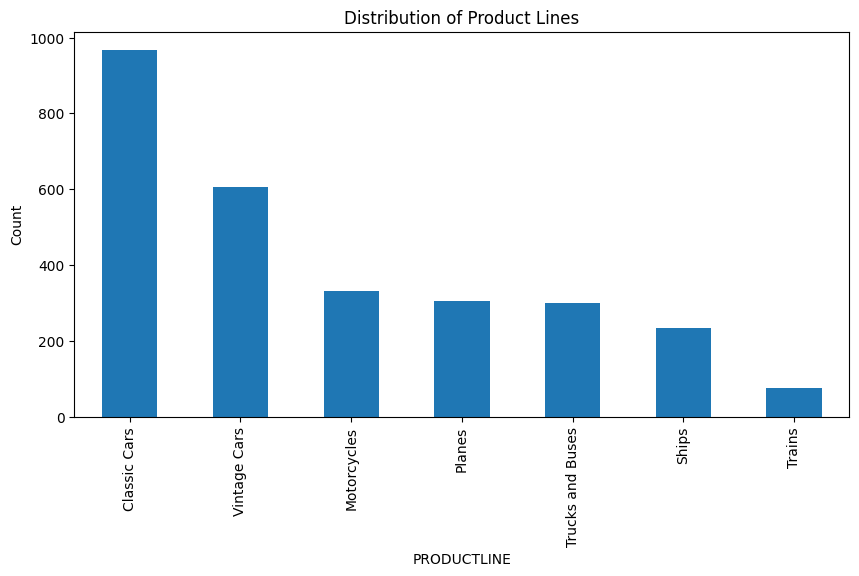

In [17]:
# Distribution Analysis
data1['PRODUCTLINE'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Product Lines')
plt.ylabel('Count')
plt.show()

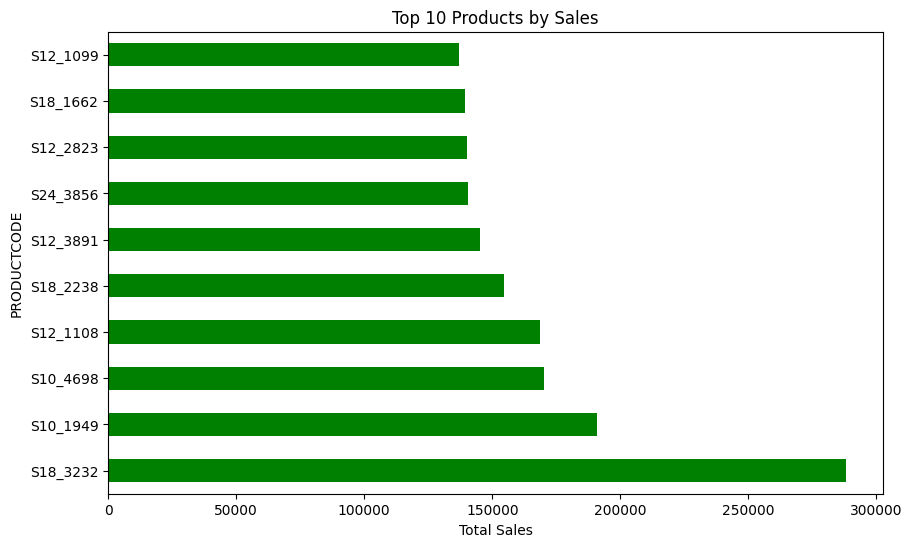

In [18]:
# Top 10 Products by Sales
top_10_products = product_sales.sort_values(ascending=False).head(10)
top_10_products.plot(kind='barh', figsize=(10,6), color='green')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.show() 

In [19]:
# Compute and display the pivot table for analysis
category_monthly_sales = data1.groupby(['PRODUCTLINE', 'MONTH'])['SALES'].sum().reset_index()
pivot_table = category_monthly_sales.pivot(index='PRODUCTLINE', columns='MONTH', values='SALES')
print("Pivot Table of Sales by Product Line and Month:")
print(pivot_table)

Pivot Table of Sales by Product Line and Month:
MONTH                    1          2          3          4          5   \
PRODUCTLINE                                                               
Classic Cars      303070.56  299647.80  277560.54  263252.00  365946.75   
Motorcycles        81113.88  122801.68   60469.98  119606.88  108335.97   
Planes             46715.81  107905.65   79735.05  103359.77   74929.05   
Ships              61287.40   68247.96   74341.94   33683.45   56156.30   
Trains             19026.58   16507.95   22581.27    4756.47   20457.34   
Trucks and Buses   78530.63   68211.07   61877.34   28790.76  151270.15   
Vintage Cars      196129.58  127119.79  177935.27  115941.63  146877.00   

MONTH                    6          7          8          9          10  \
PRODUCTLINE                                                               
Classic Cars      137419.98  245292.95  265302.43  234673.08  465002.24   
Motorcycles        49879.42   60698.23  106869.84  

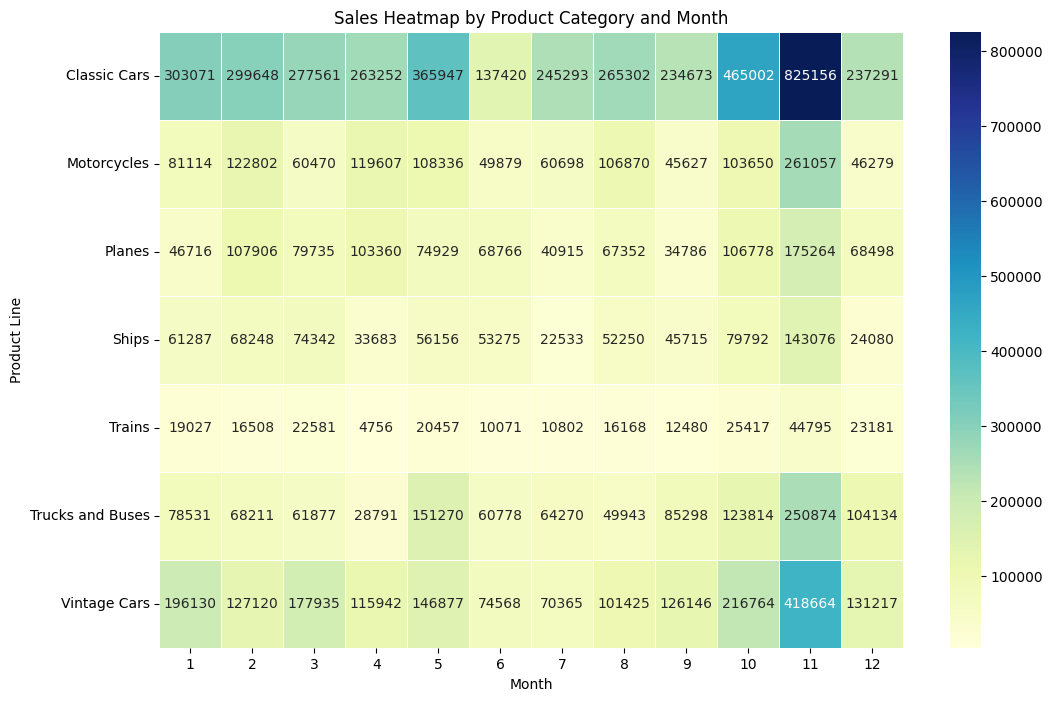

In [21]:
# Create sales heatmap by product category (PRODUCTLINE) and month
import seaborn as sns

# Group by PRODUCTLINE and MONTH, sum SALES
category_monthly_sales = data1.groupby(['PRODUCTLINE', 'MONTH'])['SALES'].sum().reset_index()

# Pivot the data for heatmap: rows=PRODUCTLINE, columns=MONTH, values=SALES
pivot_table = category_monthly_sales.pivot(index='PRODUCTLINE', columns='MONTH', values='SALES')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Sales Heatmap by Product Category and Month')
plt.xlabel('Month')
plt.ylabel('Product Line')
plt.show()

# Analysis
- November as the peak month with Classic Cars at $825,156.
- June as the lowest month.
- Category-specific patterns for each product line.

Total Sales by Country:
COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

Number of Orders by Country:
COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
dtype: int64

Average Sales 

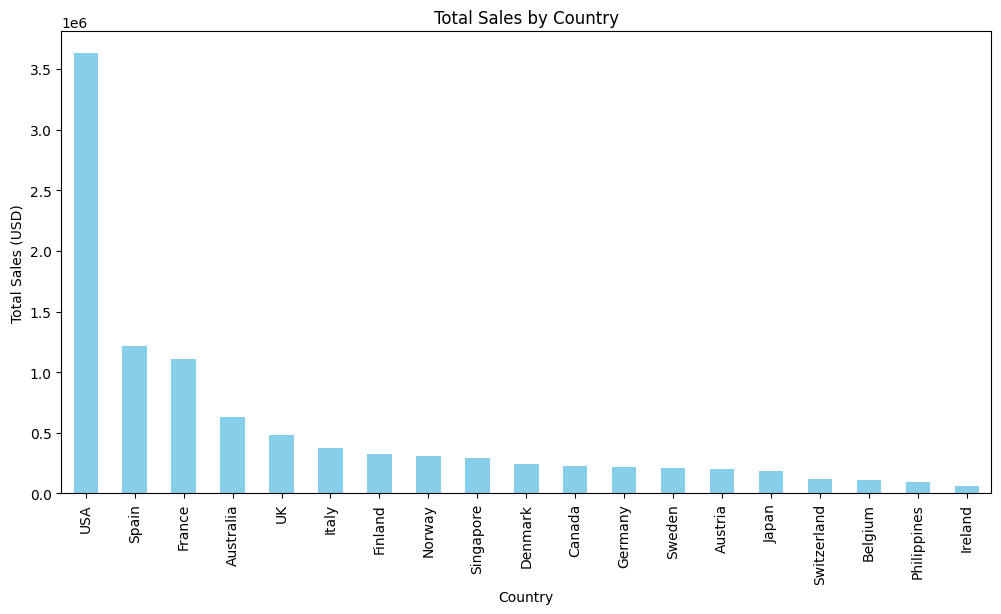

In [23]:
# Sales Analysis by Country

# Total sales by country
country_sales = data1.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("Total Sales by Country:")
print(country_sales)

# Number of orders by country
country_orders = data1.groupby('COUNTRY').size().sort_values(ascending=False)
print("\nNumber of Orders by Country:")
print(country_orders)

# Average sales per order by country
country_avg_sales = data1.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False)
print("\nAverage Sales per Order by Country:")
print(country_avg_sales)

# Plot total sales by country
country_sales.plot(kind='bar', figsize=(12,6), title='Total Sales by Country', color='skyblue')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Country')
plt.show()

# Analysis by Country

## Key Insights
- **Top Country by Sales**: USA leads with $3.63 million in total sales and 1,004 orders, indicating it's the largest market.
- **Highest Average Order Value**: Denmark has the highest average sales per order at $3,899, suggesting premium purchases or fewer but higher-value orders.
- **Market Distribution**: Europe dominates with Spain, France, and Australia as strong performers. Asia-Pacific (Singapore, Japan) shows high average values but lower volumes.
- **Opportunities**: Focus marketing in high-volume countries like USA and Spain. Explore growth in high-average countries like Denmark for upselling.

## Recommendations
- Target USA for bulk promotions due to volume.
- Investigate Denmark's success for replicating in other markets.
- Analyze why some countries (e.g., Ireland) have high averages but low orders—potential for expansion.

# Explore Relationships Between Variables

# Scatter plot: Sales vs Quantity Ordered
plt.figure(figsize=(10,6))
plt.scatter(data1['QUANTITYORDERED'], data1['SALES'], alpha=0.5)
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

# Scatter plot: Sales vs Price Each
plt.figure(figsize=(10,6))
plt.scatter(data1['PRICEEACH'], data1['SALES'], alpha=0.5)
plt.title('Sales vs Price Each')
plt.xlabel('Price Each (USD)')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

# Correlation Matrix
correlation = data1[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].corr()
print("Correlation Matrix:")
print(correlation)

# Heatmap of Correlation
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

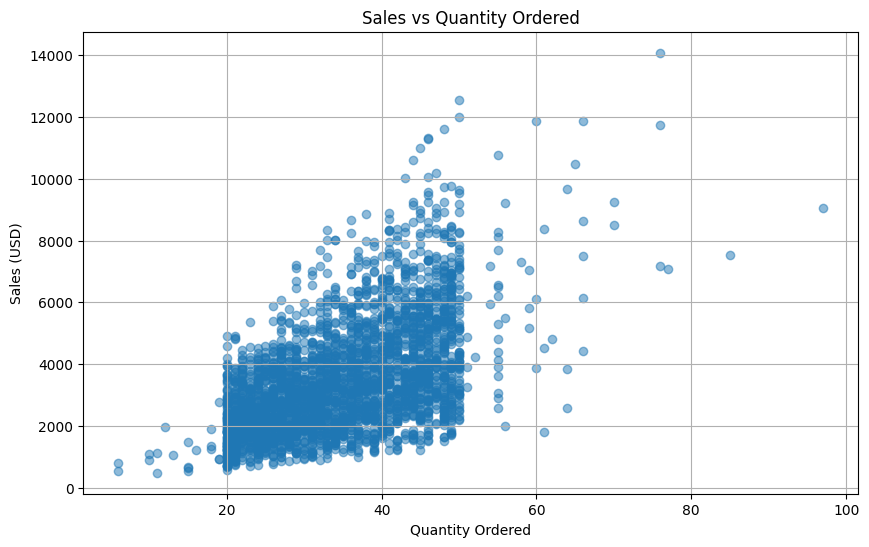

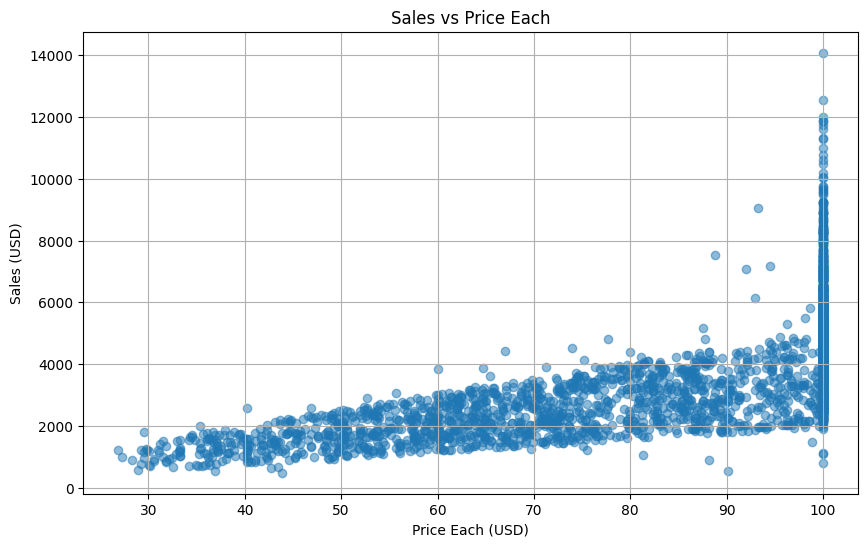

Correlation Matrix:
                    SALES  QUANTITYORDERED  PRICEEACH
SALES            1.000000         0.551426   0.657841
QUANTITYORDERED  0.551426         1.000000   0.005564
PRICEEACH        0.657841         0.005564   1.000000


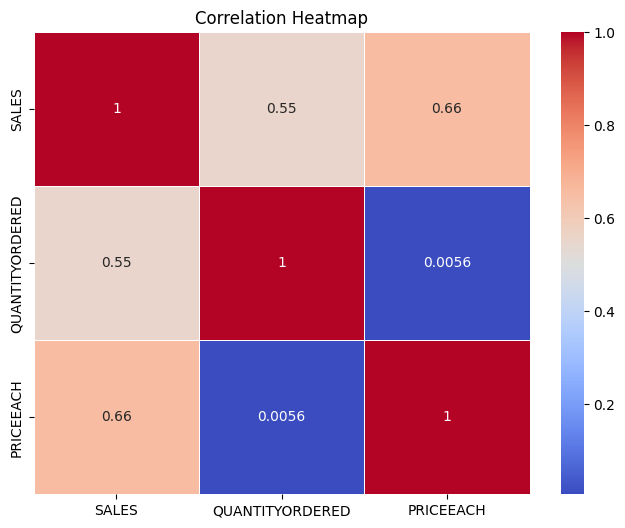

In [24]:
# Explore Relationships Between Variables

# Scatter plot: Sales vs Quantity Ordered
plt.figure(figsize=(10,6))
plt.scatter(data1['QUANTITYORDERED'], data1['SALES'], alpha=0.5)
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

# Scatter plot: Sales vs Price Each
plt.figure(figsize=(10,6))
plt.scatter(data1['PRICEEACH'], data1['SALES'], alpha=0.5)
plt.title('Sales vs Price Each')
plt.xlabel('Price Each (USD)')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

# Correlation Matrix
correlation = data1[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].corr()
print("Correlation Matrix:")
print(correlation)

# Heatmap of Correlation
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Analysis of Variable Relationships

## Key Insights
- **Sales vs Quantity Ordered**: Moderate positive correlation (0.55). Higher quantities tend to increase sales, but not strongly—suggesting other factors like price matter more.
- **Sales vs Price Each**: Strong positive correlation (0.66). Higher-priced items drive higher sales values, indicating premium products contribute significantly.
- **Quantity Ordered vs Price Each**: Very weak correlation (0.006). Quantity is largely independent of price, meaning customers buy similar volumes regardless of unit cost.

## Observations from Scatter Plots
- The scatter for Sales vs Price Each shows a clear upward trend, with sales clustering around higher prices.
- Sales vs Quantity Ordered is more spread out, with some high-quantity orders not necessarily leading to proportionally high sales.

## Recommendations
- Focus on pricing strategies: Increasing prices on high-demand items could boost revenue.
- Bundle promotions: Since quantity and price are independent, offer quantity discounts to encourage larger orders.
- Further Analysis: Explore by product line or country to see if correlations vary.